In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('sdg-airflow/dags/data/dataset.csv',sep=';', thousands='.',decimal=',')

In [749]:
df

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0       23.9975    219.25       22.500   0.2475         0.00          0.0   
1       57.4925    482.75       37.425   0.2475        22.75          9.1   
2       16.9900     10.25       16.990   0.0000         0.00          0.0   
3       38.0000      7.50       38.000   0.0000         0.00          0.0   
4       55.2300    570.50       71.980   0.0000         0.00          0.0   
...         ...       ...          ...      ...          ...          ...   
99995       NaN       NaN          NaN      NaN          NaN          NaN   
99996       NaN       NaN          NaN      NaN          NaN          NaN   
99997       NaN       NaN          NaN      NaN          NaN          NaN   
99998       NaN       NaN          NaN      NaN          NaN          NaN   
99999       NaN       NaN          NaN      NaN          NaN          NaN   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
0              0.0          0.0        0.0     -157.25  ...       0.0       N   
1              9.1          0.0        0.0      532.25  ...       0.0       Z   
2              0.0          0.0        0.0       -4.25  ...       0.0       N   
3              0.0          0.0        0.0       -1.50  ...       0.0       U   
4              0.0          0.0        0.0       38.50  ...       0.0       I   
...            ...          ...        ...         ...  ...       ...     ...   
99995          NaN          NaN        NaN         NaN  ...       0.0       S   
99996          NaN          NaN        NaN         NaN  ...       0.0       N   
99997          NaN          NaN        NaN         NaN  ...       0.0       U   
99998          NaN          NaN        NaN         NaN  ...       0.0       S   
99999          NaN          NaN        NaN         NaN  ...       0.0       H   

       kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  \
0           U       U        U         U         U         Y    361.0   
1           U       U        U         U         U         Y    240.0   
2           U       Y        U         U         U         Y   1504.0   
3           Y       U        U         U         U         Y   1812.0   
4           U       U        U         U         U         Y    434.0   
...       ...     ...      ...       ...       ...       ...      ...   
99995       U       U        U         Y         U         Y    773.0   
99996       U       U        Y         Y         Y         Y    835.0   
99997       Y       Y        U         U         U         N    433.0   
99998       U       U        U         U         U         N     75.0   
99999       U       U        U         U         U         N      5.0   

       Customer_ID  
0          1000001  
1          1000002  
2          1000003  
3          1000004  
4          1000005  
...            ...  
99995      1099996  
99996      1099997  
99997      1099998  
99998      1099999  
99999      1100000  

[100000 rows x 100 columns]

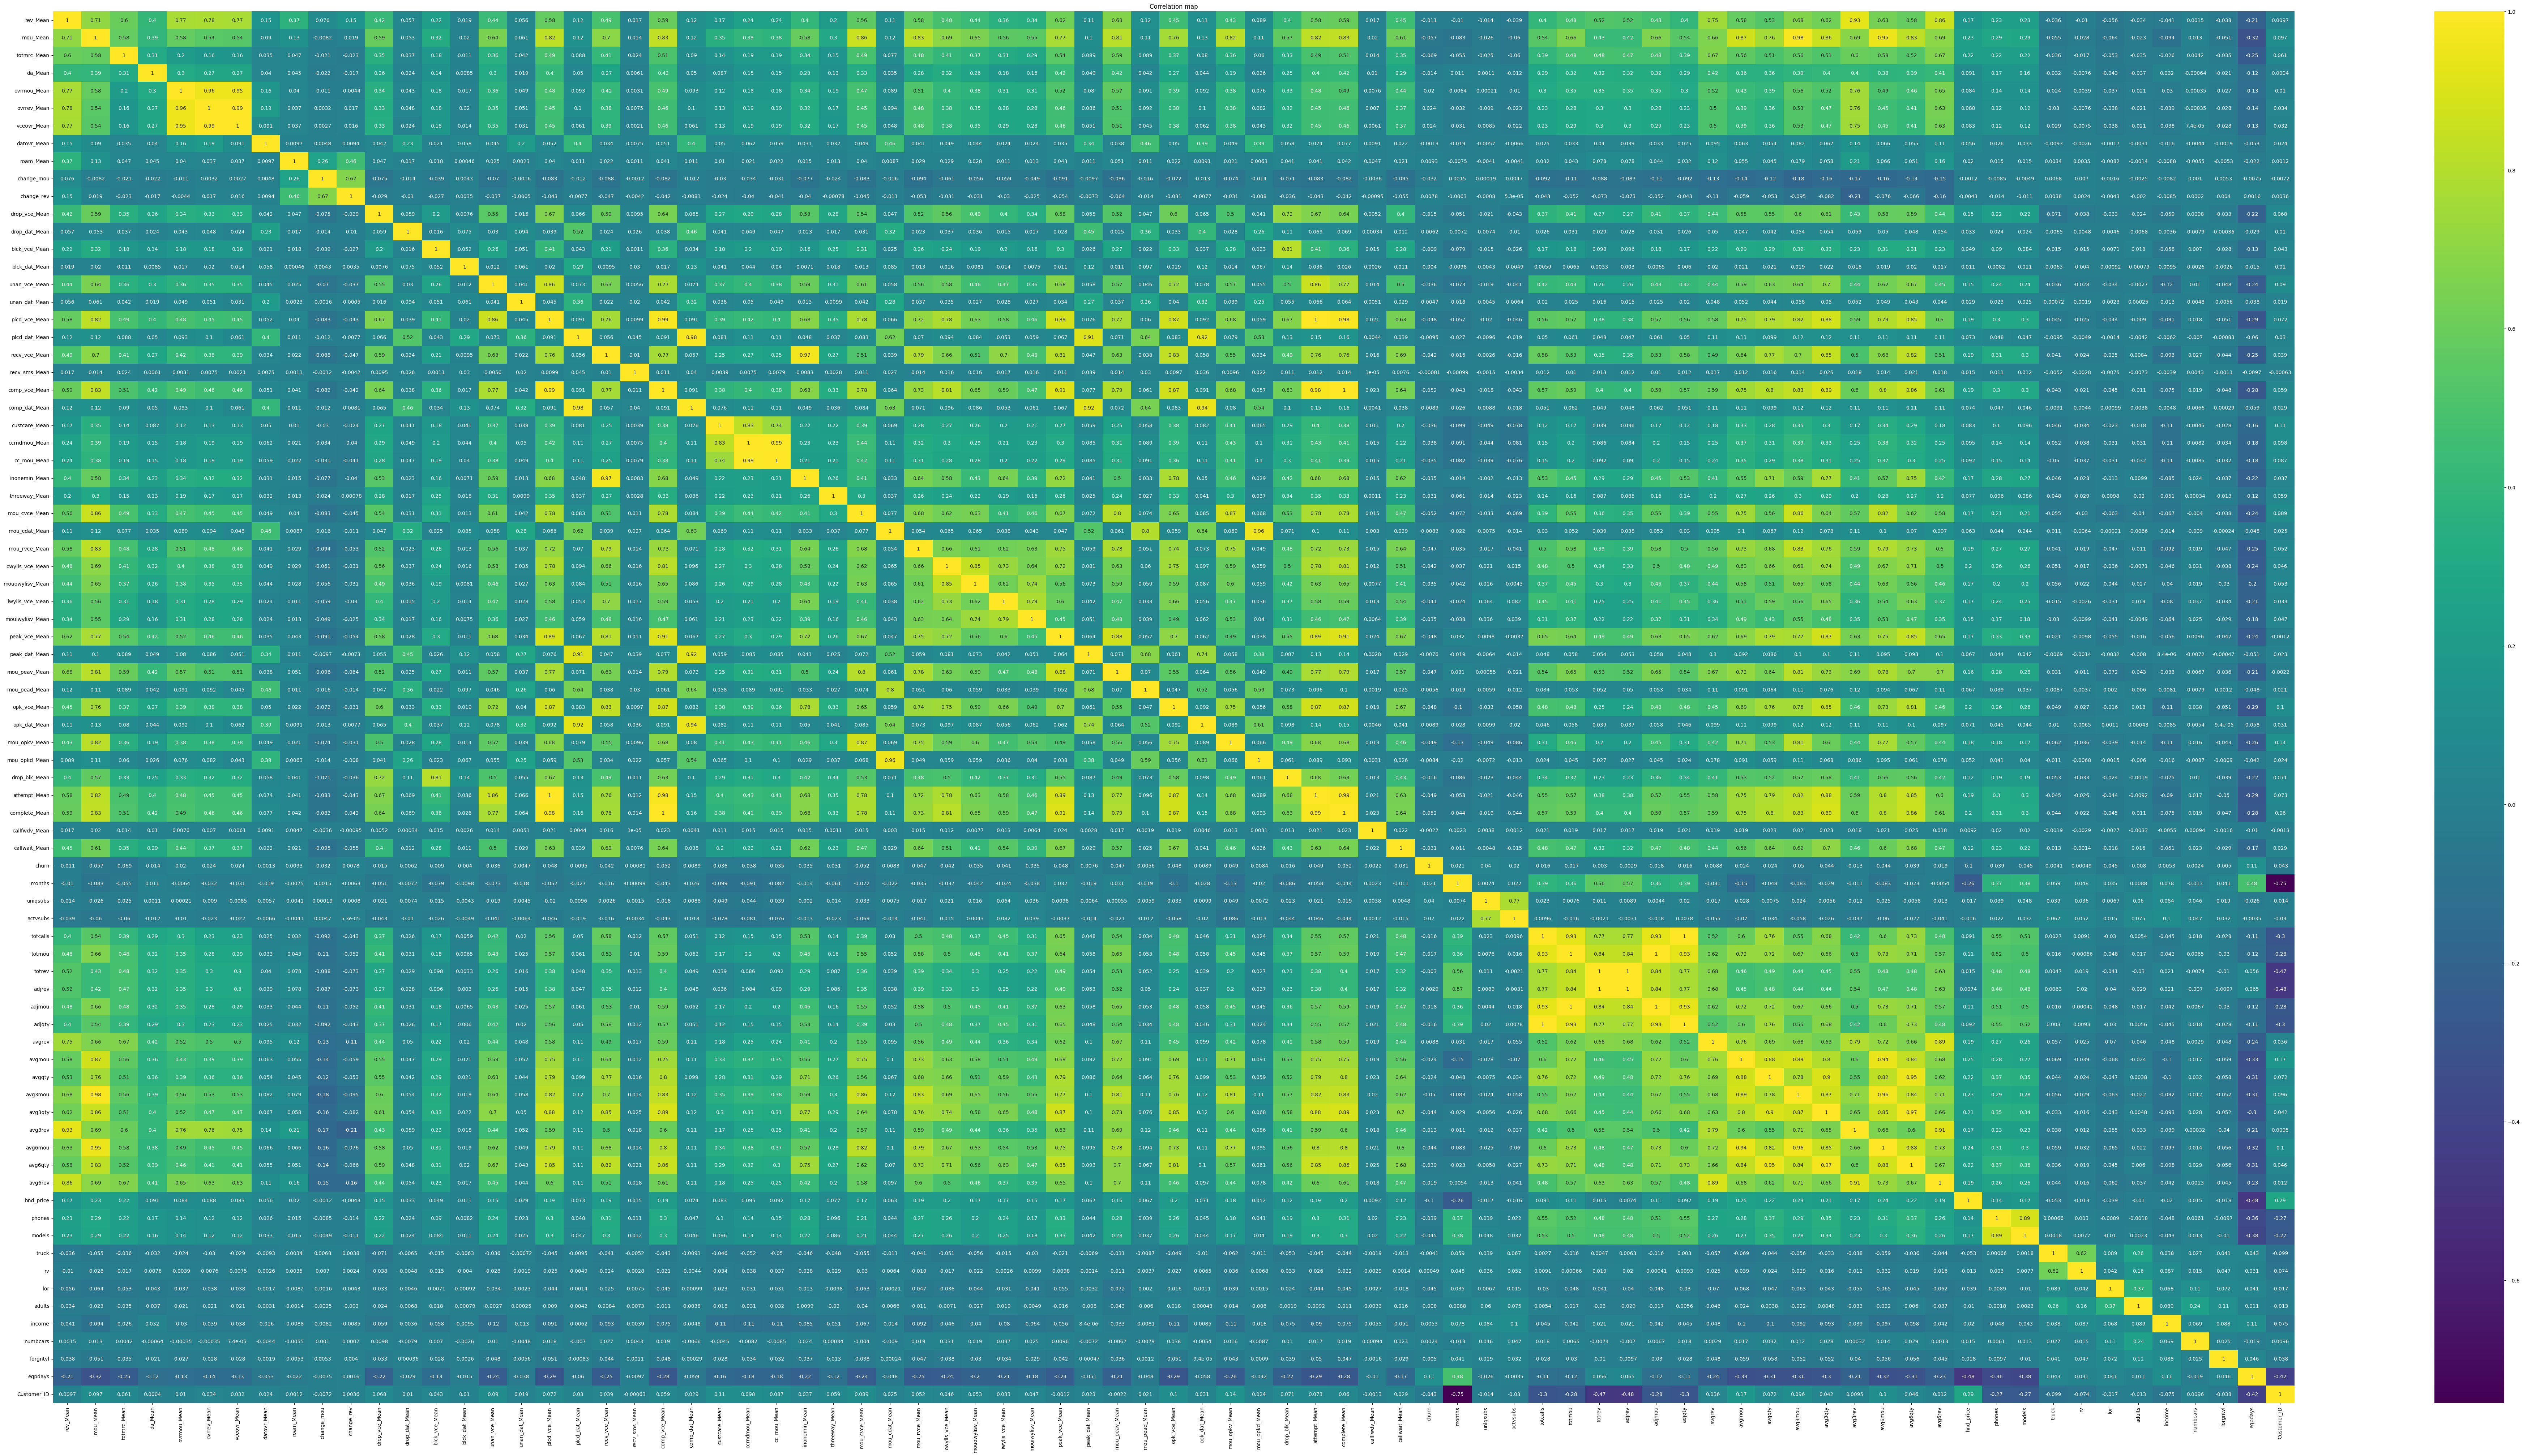

In [737]:
num_df = df.select_dtypes(include=[np.number])

cmap = sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(100,50))
sns.heatmap(data=num_df.corr(), annot=True, cmap=cmap)

plt.title('Correlation map')

plt.show()

In [4]:
cols_drop = ['Customer_ID','infobase','actvsubs','adjmou','adjqty','adjrev',
            'avg3mou','avg3qty','avg3rev','avg6mou','avg6qty','avg6rev','avgrev',
            'blck_dat_Mean','blck_vce_Mean','ccrndmou_Mean','comp_dat_Mean',
            'comp_vce_Mean','custcare_Mean','drop_dat_Mean','drop_vce_Mean',
            'opk_dat_Mean','opk_vce_Mean','ovrmou_Mean','owylis_vce_Mean',
            'peak_dat_Mean','peak_vce_Mean','totcalls','totmrc_Mean',
            'totrev']

df.drop(columns=cols_drop,inplace=True)

In [5]:
# column merging
df['mou_comp_Mean'] = df['mou_cdat_Mean'] + df['mou_cvce_Mean']
df.drop(columns=['mou_cdat_Mean','mou_cvce_Mean'], inplace=True)

df['mou_opk_Mean'] = df['mou_opkd_Mean'] + df['mou_opkv_Mean']
df.drop(columns=['mou_opkd_Mean','mou_opkv_Mean'], inplace=True)

df['mou_pea_Mean'] = df['mou_pead_Mean'] + df['mou_peav_Mean']
df.drop(columns=['mou_pead_Mean','mou_peav_Mean'], inplace=True)

df['mou_w2w_Mean'] = df['mouiwylisv_Mean'] + df['mouowylisv_Mean']
df.drop(columns=['mouiwylisv_Mean','mouowylisv_Mean'], inplace=True)

df['plcd_Mean'] = df['plcd_dat_Mean'] + df['plcd_vce_Mean']
df.drop(columns=['plcd_dat_Mean','plcd_vce_Mean'], inplace=True)

In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 65 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   da_Mean           99643 non-null   float64
 3   ovrrev_Mean       99643 non-null   float64
 4   vceovr_Mean       99643 non-null   float64
 5   datovr_Mean       99643 non-null   float64
 6   roam_Mean         99643 non-null   float64
 7   change_mou        99109 non-null   float64
 8   change_rev        99109 non-null   float64
 9   unan_vce_Mean     100000 non-null  float64
 10  unan_dat_Mean     100000 non-null  float64
 11  recv_vce_Mean     100000 non-null  float64
 12  recv_sms_Mean     100000 non-null  float64
 13  cc_mou_Mean       100000 non-null  float64
 14  inonemin_Mean     100000 non-null  float64
 15  threeway_Mean     100000 non-null  float64
 16  mou_rvce_Mean     100

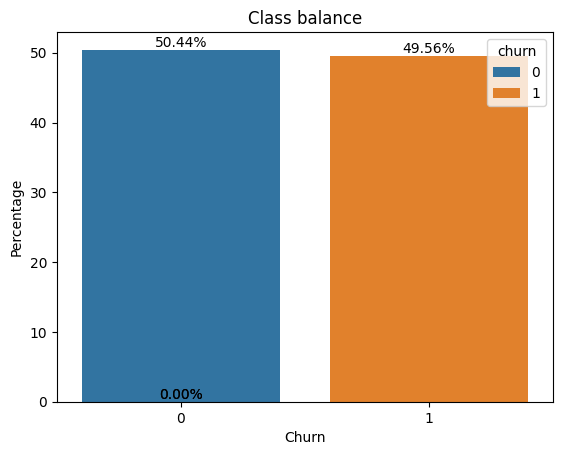

In [747]:
ax = sns.barplot(x='churn', y='churn',hue='churn',data=df, estimator=lambda x: len(x)/len(df)*100 )

plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Class balance')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
    p.get_height(),
    '{:.2f}%'.format(p.get_height()),
    ha='center',
    va='bottom')

plt.show()

In [6]:
mask = df.isna().sum() / len(df) < 0.3
reduced_df = df.loc[:, mask]
reduced_df.head()

rev_Mean  mou_Mean  da_Mean  ovrrev_Mean  vceovr_Mean  datovr_Mean  \
0   23.9975    219.25   0.2475          0.0          0.0          0.0   
1   57.4925    482.75   0.2475          9.1          9.1          0.0   
2   16.9900     10.25   0.0000          0.0          0.0          0.0   
3   38.0000      7.50   0.0000          0.0          0.0          0.0   
4   55.2300    570.50   0.0000          0.0          0.0          0.0   

   roam_Mean  change_mou  change_rev  unan_vce_Mean  ...  kid6_10  kid11_15  \
0        0.0     -157.25    -18.9975       6.333333  ...        U         U   
1        0.0      532.25     50.9875      61.333333  ...        U         U   
2        0.0       -4.25      0.0000       2.666667  ...        U         U   
3        0.0       -1.50      0.0000       0.000000  ...        U         U   
4        0.0       38.50      0.0000      77.000000  ...        U         U   

   kid16_17  creditcd  eqpdays  mou_comp_Mean  mou_opk_Mean  mou_pea_Mean  \
0         U         Y    361.0      90.643333     55.220000    132.600000   
1         U         Y    240.0     189.396667    169.343333     75.333333   
2         U         Y   1504.0       5.426667      0.233333      5.193333   
3         U         Y   1812.0       8.410000      5.450000      3.380000   
4         U         Y    434.0     285.233333    218.086667    173.476667   

   mou_w2w_Mean   plcd_Mean  
0      0.000000   52.333333  
1     27.913333  263.333333  
2      0.000000    9.000000  
3      0.256667    3.666667  
4     11.183333  222.333333  

[5 rows x 59 columns]

In [7]:
num_df=reduced_df.select_dtypes(include=[np.number])
num_df

rev_Mean  mou_Mean  da_Mean  ovrrev_Mean  vceovr_Mean  datovr_Mean  \
0       23.9975    219.25   0.2475          0.0          0.0          0.0   
1       57.4925    482.75   0.2475          9.1          9.1          0.0   
2       16.9900     10.25   0.0000          0.0          0.0          0.0   
3       38.0000      7.50   0.0000          0.0          0.0          0.0   
4       55.2300    570.50   0.0000          0.0          0.0          0.0   
...         ...       ...      ...          ...          ...          ...   
99995       NaN       NaN      NaN          NaN          NaN          NaN   
99996       NaN       NaN      NaN          NaN          NaN          NaN   
99997       NaN       NaN      NaN          NaN          NaN          NaN   
99998       NaN       NaN      NaN          NaN          NaN          NaN   
99999       NaN       NaN      NaN          NaN          NaN          NaN   

       roam_Mean  change_mou  change_rev  unan_vce_Mean  ...   rv  adults  \
0            0.0     -157.25    -18.9975       6.333333  ...  0.0     1.0   
1            0.0      532.25     50.9875      61.333333  ...  1.0     1.0   
2            0.0       -4.25      0.0000       2.666667  ...  0.0     2.0   
3            0.0       -1.50      0.0000       0.000000  ...  0.0     4.0   
4            0.0       38.50      0.0000      77.000000  ...  0.0     1.0   
...          ...         ...         ...            ...  ...  ...     ...   
99995        NaN         NaN         NaN       7.666667  ...  0.0     5.0   
99996        NaN         NaN         NaN      12.333333  ...  0.0     3.0   
99997        NaN         NaN         NaN       0.000000  ...  0.0     1.0   
99998        NaN         NaN         NaN     117.333333  ...  0.0     NaN   
99999        NaN         NaN         NaN      19.333333  ...  0.0     2.0   

       income  forgntvl  eqpdays  mou_comp_Mean  mou_opk_Mean  mou_pea_Mean  \
0         4.0       0.0    361.0      90.643333     55.220000    132.600000   
1         5.0       0.0    240.0     189.396667    169.343333     75.333333   
2         5.0       0.0   1504.0       5.426667      0.233333      5.193333   
3         6.0       0.0   1812.0       8.410000      5.450000      3.380000   
4         6.0       0.0    434.0     285.233333    218.086667    173.476667   
...       ...       ...      ...            ...           ...           ...   
99995     4.0       0.0    773.0      94.866667     73.316667     23.566667   
99996     7.0       0.0    835.0     100.760000      0.383333    121.790000   
99997     9.0       0.0    433.0       0.000000      0.000000      0.000000   
99998     NaN       0.0     75.0     565.890000    253.893333    642.886667   
99999     4.0       0.0      5.0     164.436667     30.746667    133.690000   

       mou_w2w_Mean   plcd_Mean  
0          0.000000   52.333333  
1         27.913333  263.333333  
2          0.000000    9.000000  
3          0.256667    3.666667  
4         11.183333  222.333333  
...             ...         ...  
99995      1.680000   54.666667  
99996     14.893333   69.333333  
99997      0.000000    0.000000  
99998     95.780000  551.000000  
99999      7.110000  155.666667  

[100000 rows x 43 columns]

In [615]:
# Create positive correlation matrix
corr_df = num_df.corr().abs()
# # Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

In [617]:
tri_df

rev_Mean  mou_Mean   da_Mean  ovrrev_Mean  vceovr_Mean  \
rev_Mean              NaN       NaN       NaN          NaN          NaN   
mou_Mean         0.706029       NaN       NaN          NaN          NaN   
da_Mean          0.403806  0.394583       NaN          NaN          NaN   
ovrrev_Mean      0.776647  0.541250  0.274344          NaN          NaN   
vceovr_Mean      0.772159  0.539811  0.274162     0.994752          NaN   
datovr_Mean      0.152664  0.090349  0.040290     0.192114     0.090878   
roam_Mean        0.374718  0.125442  0.044899     0.037407     0.036952   
change_mou       0.075835  0.008211  0.021603     0.003177     0.002742   
change_rev       0.150753  0.019209  0.017419     0.017132     0.016426   
unan_vce_Mean    0.436082  0.644809  0.301002     0.351220     0.351720   
unan_dat_Mean    0.055754  0.060691  0.018681     0.050929     0.030650   
recv_vce_Mean    0.487699  0.696093  0.269415     0.384534     0.386685   
recv_sms_Mean    0.016984  0.014220  0.006075     0.007523     0.002149   
cc_mou_Mean      0.242095  0.379254  0.150420     0.193896     0.190610   
inonemin_Mean    0.401952  0.583024  0.228134     0.315575     0.316979   
threeway_Mean    0.201318  0.300116  0.125655     0.171014     0.170277   
mou_rvce_Mean    0.580334  0.825693  0.282857     0.479697     0.482460   
iwylis_vce_Mean  0.358005  0.557643  0.182910     0.284038     0.285665   
drop_blk_Mean    0.403679  0.570895  0.249253     0.316507     0.315157   
attempt_Mean     0.581761  0.824029  0.404875     0.453990     0.452948   
complete_Mean    0.593872  0.832570  0.416361     0.459922     0.458659   
callfwdv_Mean    0.017423  0.019634  0.010155     0.006977     0.006139   
callwait_Mean    0.447280  0.609760  0.290748     0.370033     0.373205   
churn            0.010883  0.057027  0.013551     0.023736     0.024240   
months           0.010473  0.082638  0.010955     0.032126     0.030619   
uniqsubs         0.014402  0.026426  0.001077     0.008992     0.008519   
totmou           0.478543  0.662744  0.321785     0.284558     0.285291   
avgmou           0.575026  0.872964  0.355857     0.392311     0.391532   
avgqty           0.531143  0.762908  0.361809     0.356918     0.356513   
hnd_price        0.167376  0.231482  0.090724     0.087812     0.083230   
phones           0.228117  0.291907  0.168919     0.117436     0.116464   
models           0.225320  0.286538  0.160514     0.118493     0.116821   
truck            0.035863  0.054795  0.032306     0.029851     0.029295   
rv               0.010322  0.027519  0.007566     0.007631     0.007452   
adults           0.033564  0.023166  0.037116     0.021399     0.021327   
income           0.040699  0.093709  0.032336     0.038617     0.037516   
forgntvl         0.038434  0.051355  0.021007     0.028010     0.028211   
eqpdays          0.213402  0.315322  0.120649     0.135519     0.132001   
mou_comp_Mean    0.567063  0.863660  0.326878     0.450160     0.447575   
mou_opk_Mean     0.436935  0.818179  0.193933     0.382805     0.380379   
mou_pea_Mean     0.678669  0.812646  0.417433     0.512237     0.513863   
mou_w2w_Mean     0.422207  0.649170  0.232263     0.342406     0.343527   
plcd_Mean        0.581761  0.824029  0.404875     0.453990     0.452948   

                 datovr_Mean  roam_Mean  change_mou  change_rev  \
rev_Mean                 NaN        NaN         NaN         NaN   
mou_Mean                 NaN        NaN         NaN         NaN   
da_Mean                  NaN        NaN         NaN         NaN   
ovrrev_Mean              NaN        NaN         NaN         NaN   
vceovr_Mean              NaN        NaN         NaN         NaN   
datovr_Mean              NaN        NaN         NaN         NaN   
roam_Mean           0.009684        NaN         NaN         NaN   
change_mou          0.004757   0.257873         NaN         NaN   
change_rev          0.009423   0.456629    0.673922         NaN   
unan_vce_Mean       0.045105   0.025396    0.0

In [616]:
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print(to_drop)

['ovrrev_Mean', 'recv_vce_Mean', 'attempt_Mean', 'complete_Mean']


In [307]:
last_df = reduced_df.drop(to_drop, axis=1)
last_df.shape

(100000, 78)

In [8]:
df = reduced_df

In [9]:
print(f'Dataset shape: {df.shape}')

Dataset shape: (100000, 59)


In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 59 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   da_Mean           99643 non-null   float64
 3   ovrrev_Mean       99643 non-null   float64
 4   vceovr_Mean       99643 non-null   float64
 5   datovr_Mean       99643 non-null   float64
 6   roam_Mean         99643 non-null   float64
 7   change_mou        99109 non-null   float64
 8   change_rev        99109 non-null   float64
 9   unan_vce_Mean     100000 non-null  float64
 10  unan_dat_Mean     100000 non-null  float64
 11  recv_vce_Mean     100000 non-null  float64
 12  recv_sms_Mean     100000 non-null  float64
 13  cc_mou_Mean       100000 non-null  float64
 14  inonemin_Mean     100000 non-null  float64
 15  threeway_Mean     100000 non-null  float64
 16  mou_rvce_Mean     100

In [10]:
df['churn'].value_counts()

churn
0    50438
1    49562
Name: count, dtype: int64

In [713]:
df.to_csv('proc.csv',index=False)

In [714]:
proc_df = pd.read_csv('proc.csv')
proc_df

rev_Mean     mou_Mean  da_Mean  ovrrev_Mean  vceovr_Mean  \
0       23.997500   219.250000   0.2475     0.000000     0.000000   
1       55.230000   570.500000   0.0000     0.000000     0.000000   
2       82.275000  1312.250000   1.2375     0.000000     0.000000   
3       31.662500    25.500000   0.2475     0.000000     0.000000   
4       62.127500    97.500000   2.4750     0.000000     0.000000   
...           ...          ...      ...          ...          ...   
61967    0.000000    76.000000   0.0000     0.000000     0.000000   
61968   31.923333    63.333333   0.0000    14.933333    14.933333   
61969   34.990000     6.333333   0.0000     0.000000     0.000000   
61970  117.490000   384.000000   0.0000    87.500000    87.500000   
61971   95.170000  1745.000000   0.9900    11.250000    11.250000   

       datovr_Mean  roam_Mean  change_mou  change_rev  unan_vce_Mean  ...  \
0              0.0       0.00 -157.250000  -18.997500       6.333333  ...   
1              0.0       0.00   38.500000    0.000000      77.000000  ...   
2              0.0       0.00  156.750000    8.145000      76.000000  ...   
3              0.0       0.00   59.500000    4.027500       2.333333  ...   
4              0.0       0.00   23.500000    6.822500       4.000000  ...   
...            ...        ...         ...         ...            ...  ...   
61967          0.0       0.00    0.000000    0.000000      13.000000  ...   
61968          0.0       0.00  -38.333333  -13.183333       8.666667  ...   
61969          0.0       0.00   -6.333333    0.000000       0.666667  ...   
61970          0.0       0.00    0.000000    0.000000      27.000000  ...   
61971          0.0       4.69  122.000000   15.940000      41.333333  ...   

       prizm_social_one_T  prizm_social_one_U  dualband_N  dualband_T  \
0                   False               False       False       False   
1                   False                True       False       False   
2                   False                True        True       False   
3                   False               False       False       False   
4                   False               False       False       False   
...                   ...                 ...         ...         ...   
61967               False                True        True       False   
61968               False               False        True       False   
61969               False               False       False        True   
61970               False                True       False       False   
61971               False                True       False       False   

       dualband_Y  marital_A  marital_B  marital_M  marital_S  marital_U  
0            True      False      False      False       True      False  
1            True      False      False      False       True      False  
2           False      False      False      False       True      False  
3            True      False      False       True      False      False  
4            True      False      False      False       True      False  
...           ...        ...        ...        ...        ...        ...  
61967       False      False      False      False       True      False  
61968       False      False      False       True      False      False  
61969       False      False      False      False       True      False  
61970        True      False      False       True      False      False  
61971        True      False      False      False       True      False  

[61972 rows x 71 columns]

In [11]:
dropped_df = df.dropna()
dropped_df

rev_Mean     mou_Mean  da_Mean  ovrrev_Mean  vceovr_Mean  \
0       23.997500   219.250000   0.2475     0.000000     0.000000   
4       55.230000   570.500000   0.0000     0.000000     0.000000   
5       82.275000  1312.250000   1.2375     0.000000     0.000000   
9       31.662500    25.500000   0.2475     0.000000     0.000000   
10      62.127500    97.500000   2.4750     0.000000     0.000000   
...           ...          ...      ...          ...          ...   
99973    0.000000    76.000000   0.0000     0.000000     0.000000   
99976   31.923333    63.333333   0.0000    14.933333    14.933333   
99981   34.990000     6.333333   0.0000     0.000000     0.000000   
99986  117.490000   384.000000   0.0000    87.500000    87.500000   
99993   95.170000  1745.000000   0.9900    11.250000    11.250000   

       datovr_Mean  roam_Mean  change_mou  change_rev  unan_vce_Mean  ...  \
0              0.0       0.00 -157.250000  -18.997500       6.333333  ...   
4              0.0       0.00   38.500000    0.000000      77.000000  ...   
5              0.0       0.00  156.750000    8.145000      76.000000  ...   
9              0.0       0.00   59.500000    4.027500       2.333333  ...   
10             0.0       0.00   23.500000    6.822500       4.000000  ...   
...            ...        ...         ...         ...            ...  ...   
99973          0.0       0.00    0.000000    0.000000      13.000000  ...   
99976          0.0       0.00  -38.333333  -13.183333       8.666667  ...   
99981          0.0       0.00   -6.333333    0.000000       0.666667  ...   
99986          0.0       0.00    0.000000    0.000000      27.000000  ...   
99993          0.0       4.69  122.000000   15.940000      41.333333  ...   

       kid6_10  kid11_15  kid16_17  creditcd  eqpdays  mou_comp_Mean  \
0            U         U         U         Y    361.0      90.643333   
4            U         U         U         Y    434.0     285.233333   
5            U         U         U         Y    458.0     369.536667   
9            U         U         U         Y    601.0       3.800000   
10           U         U         U         Y    464.0     136.550000   
...        ...       ...       ...       ...      ...            ...   
99973        U         U         Y         Y    883.0      80.310000   
99976        U         U         U         Y    883.0      24.366667   
99981        Y         U         U         Y    118.0      21.906667   
99986        U         U         U         Y    489.0      81.763333   
99993        U         U         Y         Y    464.0     602.990000   

       mou_opk_Mean  mou_pea_Mean  mou_w2w_Mean   plcd_Mean  
0         55.220000    132.600000      0.000000   52.333333  
4        218.086667    173.476667     11.183333  222.333333  
5        187.760000    382.096667    328.360000  702.000000  
9          1.933333      1.866667      0.000000    6.666667  
10        70.420000     66.130000     15.366667   19.666667  
...             ...           ...           ...         ...  
99973     35.530000     56.000000      6.580000   62.333333  
99976     22.150000     16.180000      0.000000   30.333333  
99981      8.256667     15.036667      1.876667   13.666667  
99986     32.786667     70.680000      0.693333  169.333333  
99993    523.960000    760.573333    187.990000  366.000000  

[61972 rows x 59 columns]

In [12]:
cat_df=dropped_df.select_dtypes(exclude=[np.number])
cat_df

new_cell crclscod asl_flag prizm_social_one  \
0            U        A        N                S   
4            Y        A        N                U   
5            Y        C        N                U   
9            N        A        N                C   
10           Y        A        N                C   
...        ...      ...      ...              ...   
99973        U       A2        N                U   
99976        U        B        N                C   
99981        U        A        N                S   
99986        U       EA        N                U   
99993        U        B        N                U   

                                area dualband refurb_new hnd_webcap marital  \
0      NORTHWEST/ROCKY MOUNTAIN AREA        Y          N       WCMB       S   
4                   NEW ENGLAND AREA        Y          N       WCMB       S   
5                   GREAT LAKES AREA        N          N       WCMB       S   
9                        DALLAS AREA        Y          N       WCMB       M   
10                       DALLAS AREA        Y          N       WCMB       S   
...                              ...      ...        ...        ...     ...   
99973                 SOUTHWEST AREA        N          N         WC       S   
99976                 SOUTHWEST AREA        N          N         WC       M   
99981               LOS ANGELES AREA        T          N       WCMB       S   
99986               LOS ANGELES AREA        Y          N       WCMB       M   
99993               LOS ANGELES AREA        Y          N       WCMB       S   

      ethnic kid0_2 kid3_5 kid6_10 kid11_15 kid16_17 creditcd  
0          N      U      U       U        U        U        Y  
4          I      U      U       U        U        U        Y  
5          U      U      U       U        U        U        Y  
9          N      U      U       U        U        U        Y  
10         N      Y      U       U        U        U        Y  
...      ...    ...    ...     ...      ...      ...      ...  
99973      N      U      U       U        U        Y        Y  
99976      H      U      U       U        U        U        Y  
99981      N      U      U       Y        U        U        Y  
99986      S      U      U       U        U        U        Y  
99993      N      U      U       U        U        Y        Y  

[61972 rows x 16 columns]

In [625]:
for col in cat_df.columns:
    print(f'Column {col}: {len(cat_df[col].unique())}')

Column new_cell: 3
Column crclscod: 51
Column asl_flag: 2
Column prizm_social_one: 5
Column area: 19
Column dualband: 3
Column refurb_new: 2
Column hnd_webcap: 2
Column marital: 5
Column ethnic: 17
Column kid0_2: 2
Column kid3_5: 2
Column kid6_10: 2
Column kid11_15: 2
Column kid16_17: 2
Column creditcd: 2


In [13]:
label_encoded=['ethnic','crclscod','area','asl_flag','refurb_new','hnd_webcap','kid0_2','kid3_5','kid6_10','kid11_15',
                'kid16_17','creditcd']

In [14]:
df=dropped_df
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in label_encoded:
    df[feat] = le.fit_transform(df[feat].astype(str))

df

/var/folders/xk/0xthy5z1397ghd1zypfzpf8c0000gn/T/ipykernel_38135/4185113513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = le.fit_transform(df[feat].astype(str))
/var/folders/xk/0xthy5z1397ghd1zypfzpf8c0000gn/T/ipykernel_38135/4185113513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = le.fit_transform(df[feat].astype(str))
/var/folders/xk/0xthy5z1397ghd1zypfzpf8c0000gn/T/ipykernel_38135/4185113513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

rev_Mean     mou_Mean  da_Mean  ovrrev_Mean  vceovr_Mean  \
0       23.997500   219.250000   0.2475     0.000000     0.000000   
4       55.230000   570.500000   0.0000     0.000000     0.000000   
5       82.275000  1312.250000   1.2375     0.000000     0.000000   
9       31.662500    25.500000   0.2475     0.000000     0.000000   
10      62.127500    97.500000   2.4750     0.000000     0.000000   
...           ...          ...      ...          ...          ...   
99973    0.000000    76.000000   0.0000     0.000000     0.000000   
99976   31.923333    63.333333   0.0000    14.933333    14.933333   
99981   34.990000     6.333333   0.0000     0.000000     0.000000   
99986  117.490000   384.000000   0.0000    87.500000    87.500000   
99993   95.170000  1745.000000   0.9900    11.250000    11.250000   

       datovr_Mean  roam_Mean  change_mou  change_rev  unan_vce_Mean  ...  \
0              0.0       0.00 -157.250000  -18.997500       6.333333  ...   
4              0.0       0.00   38.500000    0.000000      77.000000  ...   
5              0.0       0.00  156.750000    8.145000      76.000000  ...   
9              0.0       0.00   59.500000    4.027500       2.333333  ...   
10             0.0       0.00   23.500000    6.822500       4.000000  ...   
...            ...        ...         ...         ...            ...  ...   
99973          0.0       0.00    0.000000    0.000000      13.000000  ...   
99976          0.0       0.00  -38.333333  -13.183333       8.666667  ...   
99981          0.0       0.00   -6.333333    0.000000       0.666667  ...   
99986          0.0       0.00    0.000000    0.000000      27.000000  ...   
99993          0.0       4.69  122.000000   15.940000      41.333333  ...   

       kid6_10  kid11_15  kid16_17  creditcd  eqpdays  mou_comp_Mean  \
0            0         0         0         1    361.0      90.643333   
4            0         0         0         1    434.0     285.233333   
5            0         0         0         1    458.0     369.536667   
9            0         0         0         1    601.0       3.800000   
10           0         0         0         1    464.0     136.550000   
...        ...       ...       ...       ...      ...            ...   
99973        0         0         1         1    883.0      80.310000   
99976        0         0         0         1    883.0      24.366667   
99981        1         0         0         1    118.0      21.906667   
99986        0         0         0         1    489.0      81.763333   
99993        0         0         1         1    464.0     602.990000   

       mou_opk_Mean  mou_pea_Mean  mou_w2w_Mean   plcd_Mean  
0         55.220000    132.600000      0.000000   52.333333  
4        218.086667    173.476667     11.183333  222.333333  
5        187.760000    382.096667    328.360000  702.000000  
9          1.933333      1.866667      0.000000    6.666667  
10        70.420000     66.130000     15.366667   19.666667  
...             ...           ...           ...         ...  
99973     35.530000     56.000000      6.580000   62.333333  
99976     22.150000     16.180000      0.000000   30.333333  
99981      8.256667     15.036667      1.876667   13.666667  
99986     32.786667     70.680000      0.693333  169.333333  
99993    523.960000    760.573333    187.990000  366.000000  

[61972 rows x 59 columns]

In [628]:
for col in df.select_dtypes(exclude=[np.number]).columns:
    print(f'Column {col}: {len(df[col].unique())}')

Column new_cell: 3
Column prizm_social_one: 5
Column dualband: 3
Column marital: 5


In [15]:
# encode categorical variables
df = pd.get_dummies(df, prefix_sep='_')
df

rev_Mean     mou_Mean  da_Mean  ovrrev_Mean  vceovr_Mean  \
0       23.997500   219.250000   0.2475     0.000000     0.000000   
4       55.230000   570.500000   0.0000     0.000000     0.000000   
5       82.275000  1312.250000   1.2375     0.000000     0.000000   
9       31.662500    25.500000   0.2475     0.000000     0.000000   
10      62.127500    97.500000   2.4750     0.000000     0.000000   
...           ...          ...      ...          ...          ...   
99973    0.000000    76.000000   0.0000     0.000000     0.000000   
99976   31.923333    63.333333   0.0000    14.933333    14.933333   
99981   34.990000     6.333333   0.0000     0.000000     0.000000   
99986  117.490000   384.000000   0.0000    87.500000    87.500000   
99993   95.170000  1745.000000   0.9900    11.250000    11.250000   

       datovr_Mean  roam_Mean  change_mou  change_rev  unan_vce_Mean  ...  \
0              0.0       0.00 -157.250000  -18.997500       6.333333  ...   
4              0.0       0.00   38.500000    0.000000      77.000000  ...   
5              0.0       0.00  156.750000    8.145000      76.000000  ...   
9              0.0       0.00   59.500000    4.027500       2.333333  ...   
10             0.0       0.00   23.500000    6.822500       4.000000  ...   
...            ...        ...         ...         ...            ...  ...   
99973          0.0       0.00    0.000000    0.000000      13.000000  ...   
99976          0.0       0.00  -38.333333  -13.183333       8.666667  ...   
99981          0.0       0.00   -6.333333    0.000000       0.666667  ...   
99986          0.0       0.00    0.000000    0.000000      27.000000  ...   
99993          0.0       4.69  122.000000   15.940000      41.333333  ...   

       prizm_social_one_T  prizm_social_one_U  dualband_N  dualband_T  \
0                   False               False       False       False   
4                   False                True       False       False   
5                   False                True        True       False   
9                   False               False       False       False   
10                  False               False       False       False   
...                   ...                 ...         ...         ...   
99973               False                True        True       False   
99976               False               False        True       False   
99981               False               False       False        True   
99986               False                True       False       False   
99993               False                True       False       False   

       dualband_Y  marital_A  marital_B  marital_M  marital_S  marital_U  
0            True      False      False      False       True      False  
4            True      False      False      False       True      False  
5           False      False      False      False       True      False  
9            True      False      False       True      False      False  
10           True      False      False      False       True      False  
...           ...        ...        ...        ...        ...        ...  
99973       False      False      False      False       True      False  
99976       False      False      False       True      False      False  
99981       False      False      False      False       True      False  
99986        True      False      False       True      False      False  
99993        True      False      False      False       True      False  

[61972 rows x 71 columns]

<Axes: >

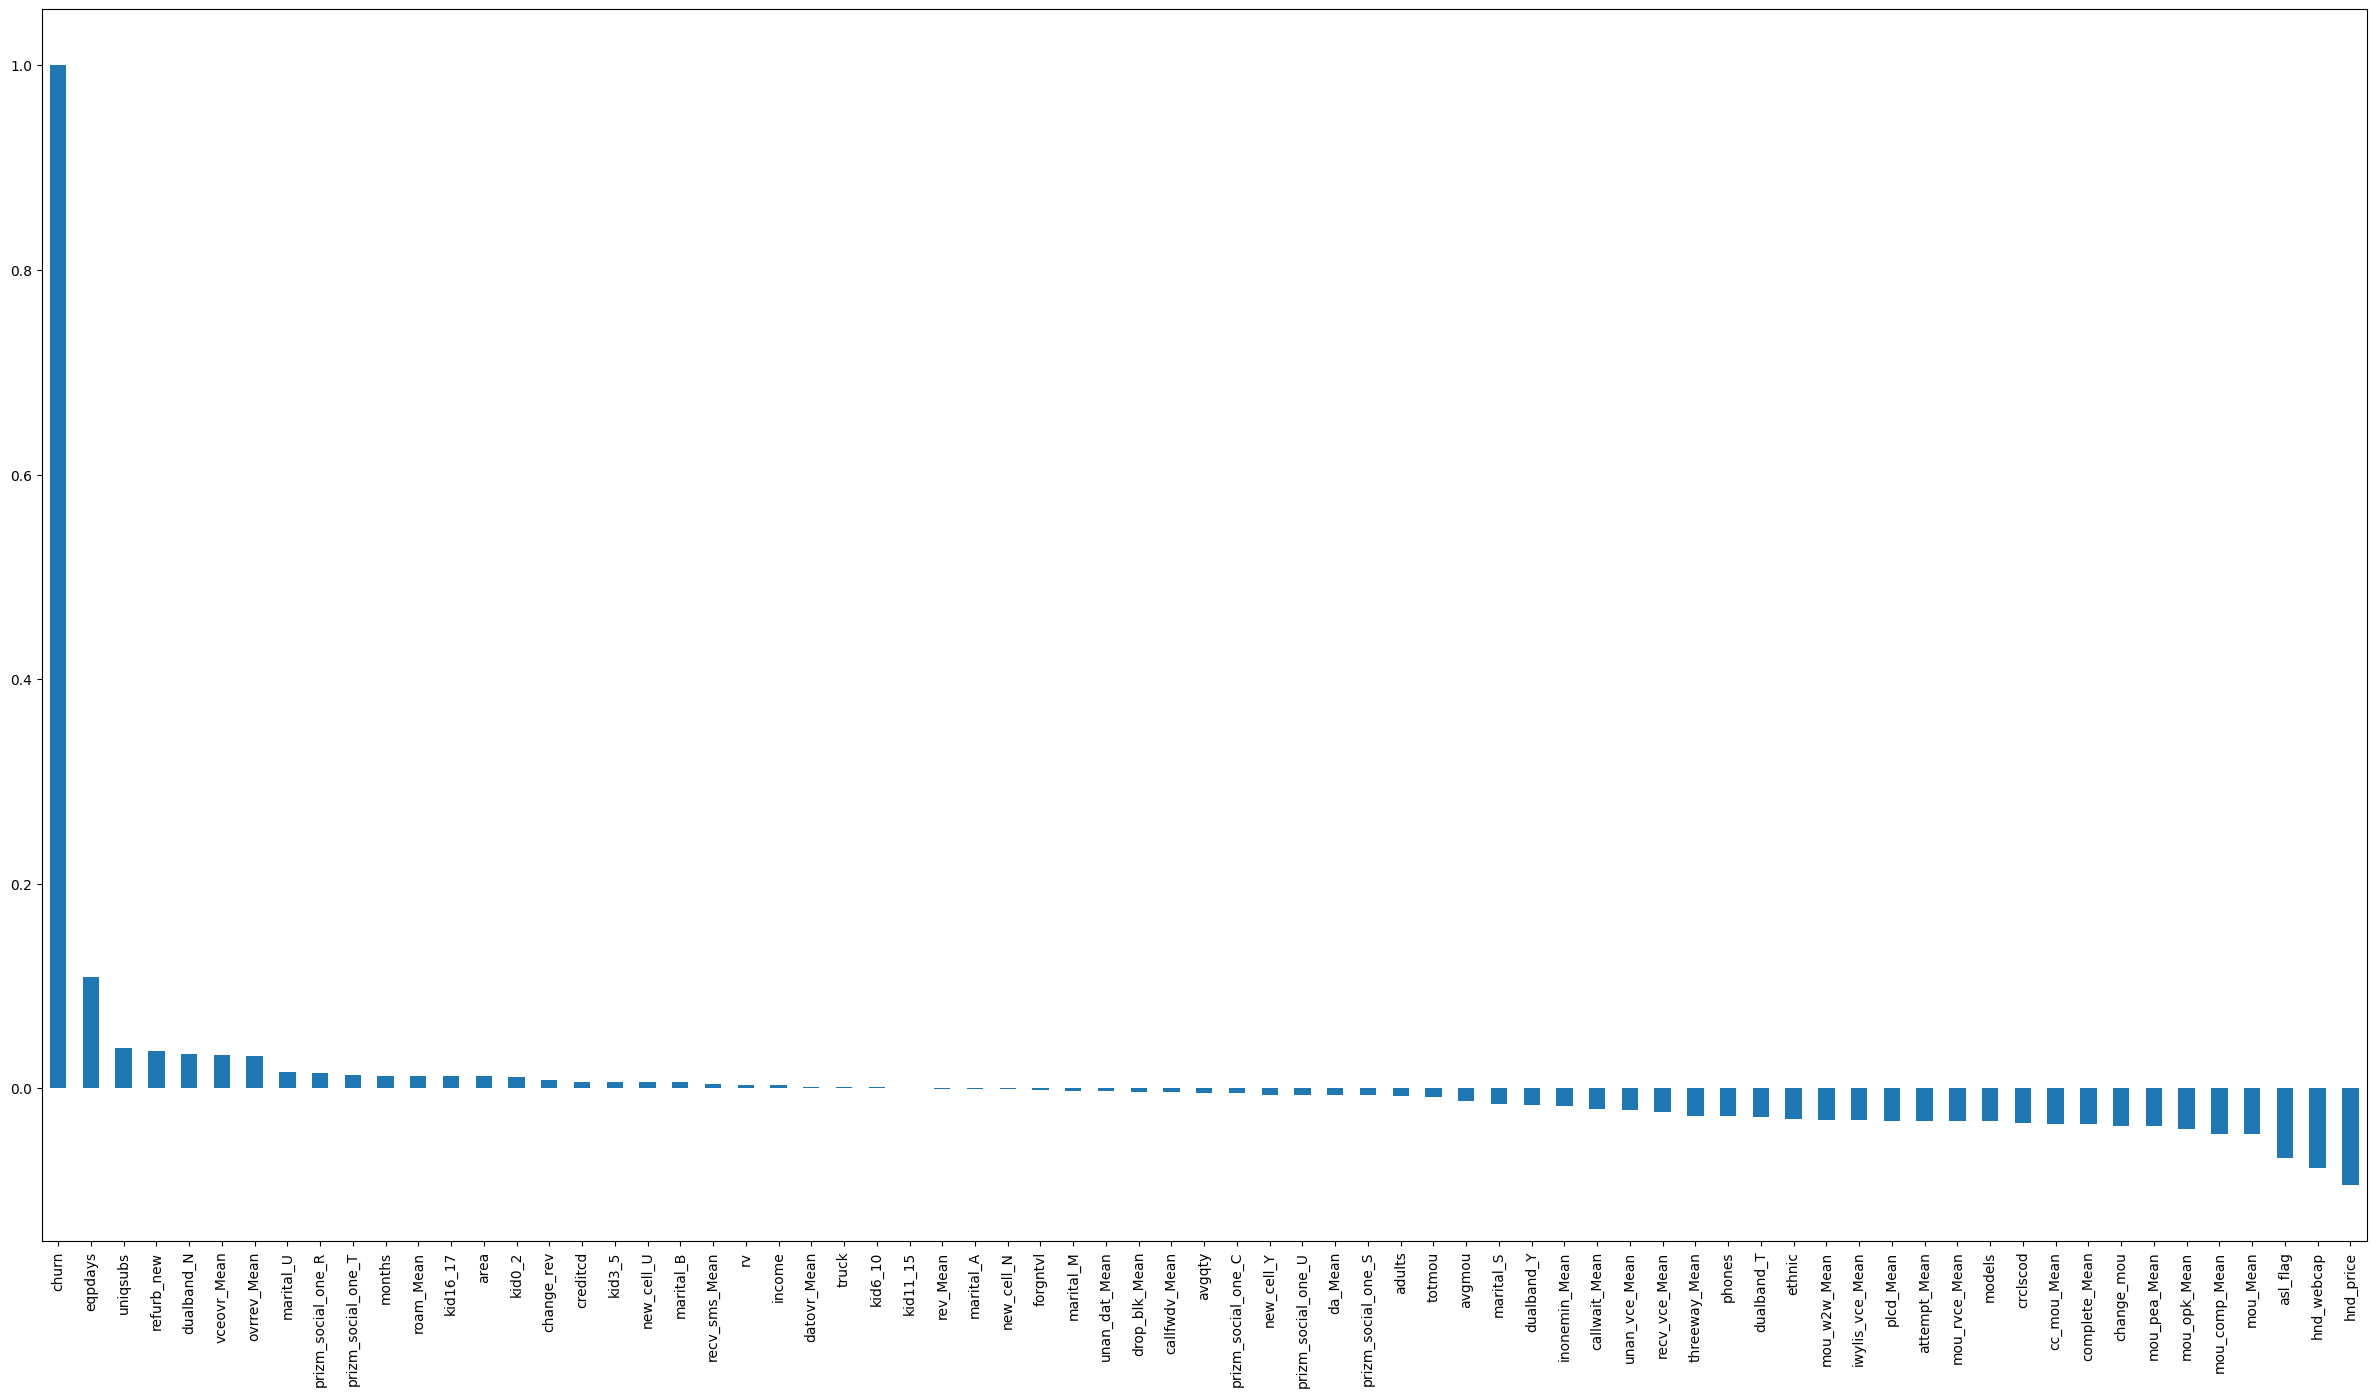

In [630]:


#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(30,16))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')



In [16]:
X, y = df.drop(columns='churn'), df.churn

In [17]:
numericals = X.select_dtypes(include=[np.number]).columns.values
numericals.shape

(54,)

In [316]:
# Impute missing values
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imputed_X=pd.DataFrame(imp.fit_transform(X))
imputed_X.columns=X.columns
imputed_X.index=X.index

X = imputed_X
X

rev_Mean  totmrc_Mean   da_Mean  vceovr_Mean  datovr_Mean  roam_Mean  \
0      23.997500    22.500000  0.247500     0.000000     0.000000   0.000000   
1      57.492500    37.425000  0.247500     9.100000     0.000000   0.000000   
2      16.990000    16.990000  0.000000     0.000000     0.000000   0.000000   
3      38.000000    38.000000  0.000000     0.000000     0.000000   0.000000   
4      55.230000    71.980000  0.000000     0.000000     0.000000   0.000000   
...          ...          ...       ...          ...          ...        ...   
99995  58.719985    46.179136  0.888828    13.295062     0.261318   1.286405   
99996  58.719985    46.179136  0.888828    13.295062     0.261318   1.286405   
99997  58.719985    46.179136  0.888828    13.295062     0.261318   1.286405   
99998  58.719985    46.179136  0.888828    13.295062     0.261318   1.286405   
99999  58.719985    46.179136  0.888828    13.295062     0.261318   1.286405   

       change_mou  change_rev  drop_vce_Mean  drop_dat_Mean  ...  ethnic_S  \
0     -157.250000  -18.997500       0.666667            0.0  ...       0.0   
1      532.250000   50.987500       8.333333            0.0  ...       0.0   
2       -4.250000    0.000000       0.333333            0.0  ...       0.0   
3       -1.500000    0.000000       0.000000            0.0  ...       0.0   
4       38.500000    0.000000       9.666667            0.0  ...       0.0   
...           ...         ...            ...            ...  ...       ...   
99995  -13.933818   -1.021067       2.000000            0.0  ...       1.0   
99996  -13.933818   -1.021067       3.000000            0.0  ...       0.0   
99997  -13.933818   -1.021067       0.000000            0.0  ...       0.0   
99998  -13.933818   -1.021067      18.666667            0.0  ...       1.0   
99999  -13.933818   -1.021067       5.666667            0.0  ...       0.0   

       ethnic_U  ethnic_X  ethnic_Z  kid0_2_Y  kid3_5_Y  kid6_10_Y  \
0           0.0       0.0       0.0       0.0       0.0        0.0   
1           0.0       0.0       1.0       0.0       0.0        0.0   
2           0.0       0.0       0.0       0.0       1.0        0.0   
3           1.0       0.0       0.0       1.0       0.0        0.0   
4           0.0       0.0       0.0       0.0       0.0        0.0   
...         ...       ...       ...       ...       ...        ...   
99995       0.0       0.0       0.0       0.0       0.0        0.0   
99996       0.0       0.0       0.0       0.0       0.0        1.0   
99997       1.0       0.0       0.0       1.0       1.0        0.0   
99998       0.0       0.0       0.0       0.0       0.0        0.0   
99999       0.0       0.0       0.0       0.0       0.0        0.0   

       kid11_15_Y  kid16_17_Y  creditcd_Y  
0             0.0         0.0         1.0  
1             0.0         0.0         1.0  
2             0.0         0.0         1.0  
3             0.0         0.0         1.0  
4             0.0         0.0         1.0  
...           ...         ...         ...  
99995         1.0         0.0         1.0  
99996         1.0         1.0         1.0  
99997         0.0         0.0         0.0  
99998         0.0         0.0         0.0  
99999         0.0         0.0         0.0  

[100000 rows x 171 columns]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=616)

In [693]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train[numericals])
standardized_X = scaler.transform(X_train[numericals])
standardized_X_test = scaler.transform(X_test[numericals])
X_train[numericals] = standardized_X
X_test[numericals] = standardized_X_test

In [677]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)).fit(X_train[numericals])
standardized_X = scaler.transform(X_train[numericals])
standardized_X_test = scaler.transform(X_test[numericals])
X_train[numericals] = standardized_X
X_test[numericals] = standardized_X_test

In [694]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

In [695]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [696]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.5944492254733219

In [697]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5944492254733219

Axes(0.125,0.11;0.775x0.77)


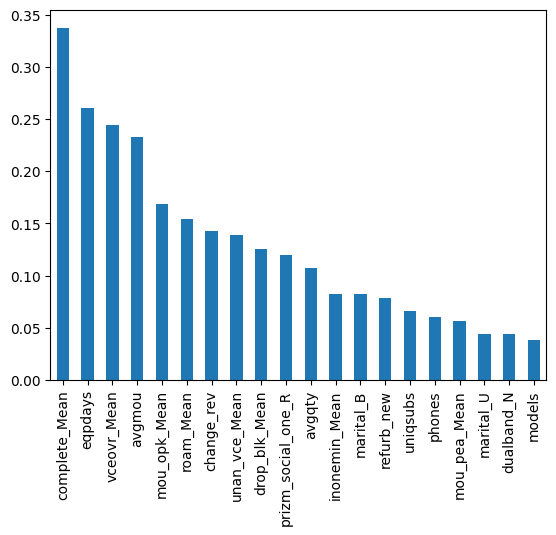

In [698]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:20].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


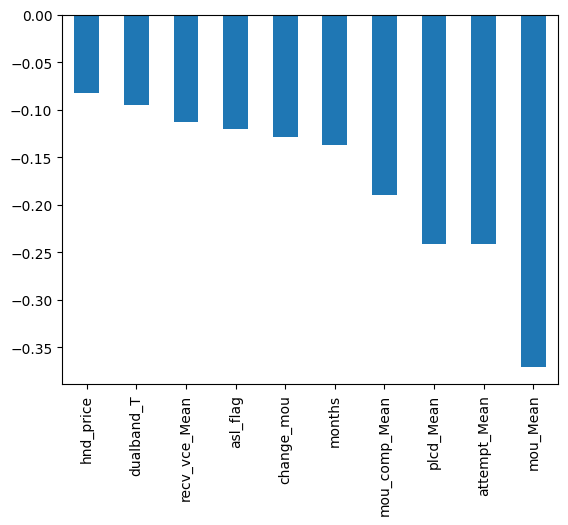

In [699]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

CM
[[6735 3102]
 [4503 4252]]


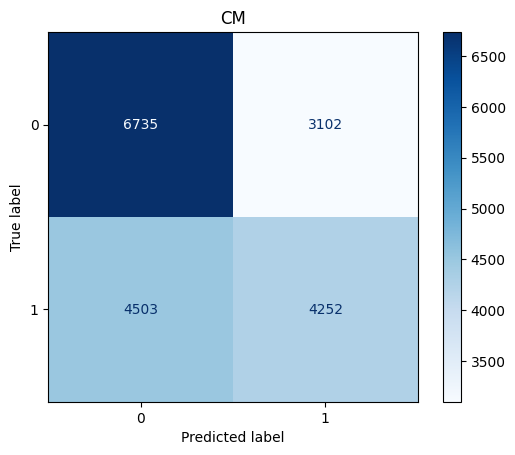

In [691]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title('CM')

print('CM')
print(disp.confusion_matrix)

plt.show()

In [536]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=2,n_estimators=250)

In [538]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=250)

In [539]:
y_pred_rf = rf.predict(X_test)

In [540]:
accuracy_score(y_test, y_pred_rf)

0.6283947891366748

In [541]:
accuracy_score(y_train, rf.predict(X_train))

0.731221462537557

In [542]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      9494
           1       0.62      0.56      0.59      8622

    accuracy                           0.63     18116
   macro avg       0.63      0.63      0.62     18116
weighted avg       0.63      0.63      0.63     18116



CM
[[6582 2912]
 [3820 4802]]


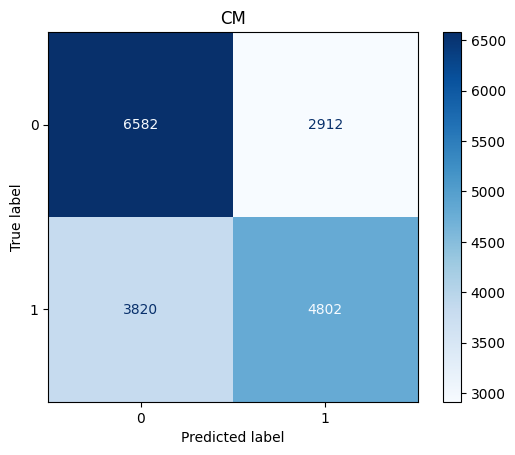

In [543]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    rf,
    X_test,
    y_test,
    
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title('CM')

print('CM')
print(disp.confusion_matrix)

plt.show()

CM


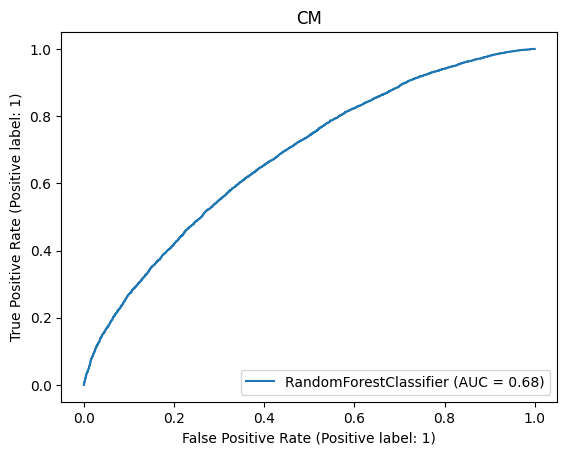

In [544]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    rf,
    X_test,
    y_test
)
disp.ax_.set_title('CM')

print('CM')
print(disp)

plt.show()

In [688]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 115, min_samples_split= 4, max_features= 1.0, max_depth= 5)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_score(y_test, y_pred_gb)

0.6346277969018933

CM
[[6670 3167]
 [3626 5129]]


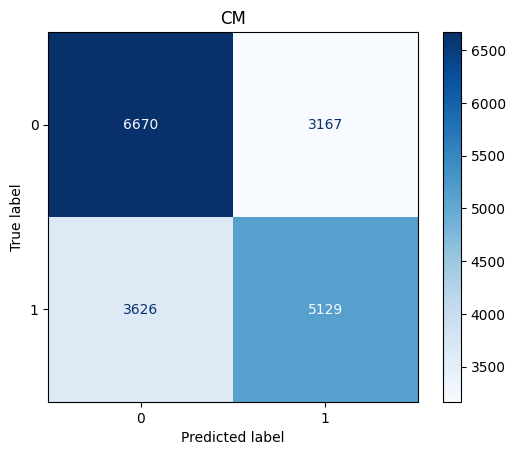

In [689]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    gb,
    X_test,
    y_test,
    
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title('CM')

print('CM')
print(disp.confusion_matrix)

plt.show()

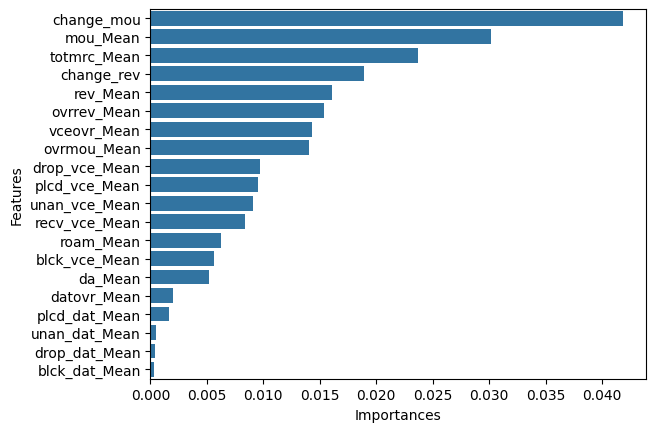

In [547]:
features = X.columns
feature_importances = rf.feature_importances_
N_FEATURES=20
features_df = pd.DataFrame({'Features':features[:N_FEATURES], 'Importances':feature_importances[:N_FEATURES]}).sort_values('Importances', ascending=False)
g=sns.barplot(data=features_df,x='Importances',y='Features')
plt.show()


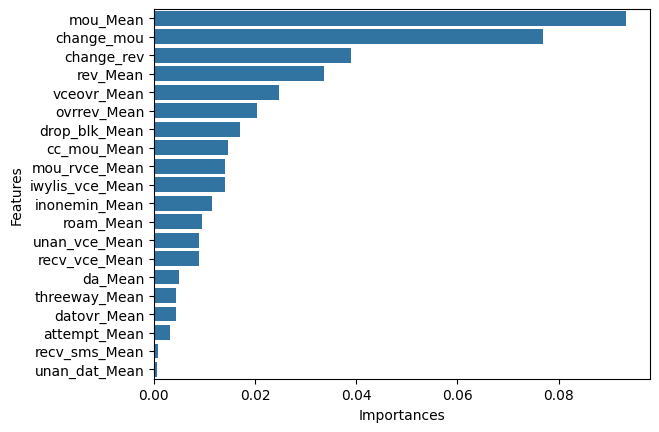

In [690]:
features = X.columns
feature_importances = gb.feature_importances_
N_FEATURES=20
features_df = pd.DataFrame({'Features':features[:N_FEATURES], 'Importances':feature_importances[:N_FEATURES]}).sort_values('Importances', ascending=False)
g=sns.barplot(data=features_df,x='Importances',y='Features')
plt.show()


In [558]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def create_models(seed=616):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [559]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.5240671229852064)
Classifier: k_nearest_neighbors, Accuracy: 0.5407926694634577)


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: logistic_regression, Accuracy: 0.5915765069551777)
Classifier: support_vector_machines, Accuracy: 0.603223669684257)
Classifier: random_forest, Accuracy: 0.6149812320600574)
Classifier: gradient_boosting, Accuracy: 0.6313755795981453)


In [565]:
from sklearn.model_selection import RandomizedSearchCV
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=20,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

/usr/local/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/si

{'n_estimators': 115, 'min_samples_split': 4, 'max_features': 'auto', 'max_depth': 5}


In [567]:
random_search.best_score_

0.6328042608356912

In [21]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Build the pipeline

step1 = ColumnTransformer(
    [
        ("target_enc", StandardScaler(), numericals),
    ],
    remainder="passthrough",
)

logreg = LogisticRegression(max_iter=5000)
pipe = Pipeline([
        ('num_prep', step1),
        ('classifier', logreg)])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')

59.4% test set accuracy


In [25]:
from joblib import dump, load
dump(pipe, 'logreg.joblib')

['logreg.joblib']

In [33]:
pipe2 = load('sdg-airflow/dags/model/model_logreg.joblib')

/usr/local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ColumnTransformer from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For m

In [34]:
pipe2.score(X_test, y_test)

0.5944492254733219

Axes(0.125,0.11;0.775x0.77)


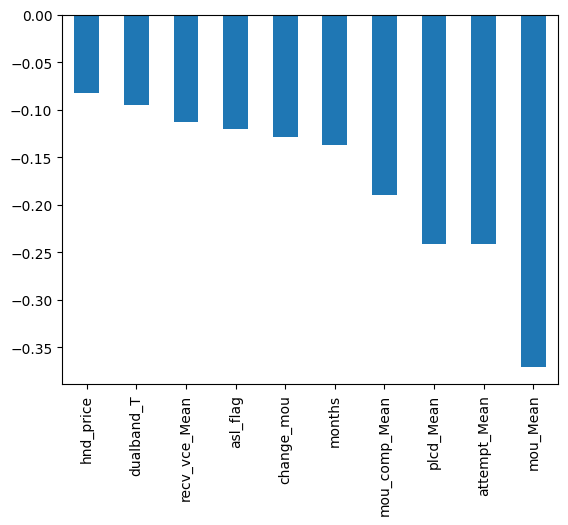

In [35]:
model = pipe2.named_steps['classifier']
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [716]:
X_holdout = X_test

In [717]:
X_holdout

rev_Mean  mou_Mean  da_Mean  ovrrev_Mean  vceovr_Mean  datovr_Mean  \
76369  107.4400   1818.00   2.7225       0.0000       0.0000          0.0   
44034   33.8900     66.75   0.0000       3.9000       0.0000          3.9   
68977   38.9550   1266.00   0.0000       1.4000       1.4000          0.0   
48660   38.6800    723.25   0.7425      27.9375      27.9375          0.0   
53262   89.5325    772.75   2.2275      36.5250      36.5250          0.0   
...         ...       ...      ...          ...          ...          ...   
3217    16.9900     24.50   0.0000       0.0000       0.0000          0.0   
49888   75.2375    470.25   0.2475       0.0000       0.0000          0.0   
74295   36.4975    143.00   0.9900       0.0000       0.0000          0.0   
20613   50.4850    613.50   0.4950       0.0000       0.0000          0.0   
26717   18.9900      1.50   0.0000       0.0000       0.0000          0.0   

       roam_Mean  change_mou  change_rev  unan_vce_Mean  ...  \
76369     0.0000      131.00     -3.4500      58.333333  ...   
44034     0.0000      -13.75     -3.9000       7.666667  ...   
68977     0.0000      188.00      1.0350       0.000000  ...   
48660     0.0000      320.75     81.5500      13.000000  ...   
53262     0.0000      -67.75    -34.5925      25.000000  ...   
...          ...         ...         ...            ...  ...   
3217      0.0000      -10.50      0.0000       6.000000  ...   
49888     0.0000       76.75     -0.2475      10.666667  ...   
74295     0.5175      -96.00     -1.5075       0.000000  ...   
20613     0.0000       26.50      0.4950      22.333333  ...   
26717     0.0000       -1.50      0.0000       0.000000  ...   

       prizm_social_one_T  prizm_social_one_U  dualband_N  dualband_T  \
76369               False                True       False       False   
44034               False               False       False       False   
68977                True               False       False       False   
48660               False               False       False       False   
53262               False                True        True       False   
...                   ...                 ...         ...         ...   
3217                False               False       False       False   
49888               False               False       False       False   
74295               False               False       False       False   
20613               False               False       False       False   
26717               False               False       False       False   

       dualband_Y  marital_A  marital_B  marital_M  marital_S  marital_U  
76369        True      False      False      False       True      False  
44034        True      False      False      False       True      False  
68977        True      False      False       True      False      False  
48660        True      False      False      False      False       True  
53262       False      False      False       True      False      False  
...           ...        ...        ...        ...        ...        ...  
3217         True      False      False       True      False      False  
49888        True      False      False       True      False      False  
74295        True      False      False       True      False      False  
20613        True      False      False       True      False      False  
26717        True      False      False       True      False      False  

[18592 rows x 70 columns]

In [718]:
X_holdout['churn'] = y_test

In [719]:
X_holdout

rev_Mean  mou_Mean  da_Mean  ovrrev_Mean  vceovr_Mean  datovr_Mean  \
76369  107.4400   1818.00   2.7225       0.0000       0.0000          0.0   
44034   33.8900     66.75   0.0000       3.9000       0.0000          3.9   
68977   38.9550   1266.00   0.0000       1.4000       1.4000          0.0   
48660   38.6800    723.25   0.7425      27.9375      27.9375          0.0   
53262   89.5325    772.75   2.2275      36.5250      36.5250          0.0   
...         ...       ...      ...          ...          ...          ...   
3217    16.9900     24.50   0.0000       0.0000       0.0000          0.0   
49888   75.2375    470.25   0.2475       0.0000       0.0000          0.0   
74295   36.4975    143.00   0.9900       0.0000       0.0000          0.0   
20613   50.4850    613.50   0.4950       0.0000       0.0000          0.0   
26717   18.9900      1.50   0.0000       0.0000       0.0000          0.0   

       roam_Mean  change_mou  change_rev  unan_vce_Mean  ...  \
76369     0.0000      131.00     -3.4500      58.333333  ...   
44034     0.0000      -13.75     -3.9000       7.666667  ...   
68977     0.0000      188.00      1.0350       0.000000  ...   
48660     0.0000      320.75     81.5500      13.000000  ...   
53262     0.0000      -67.75    -34.5925      25.000000  ...   
...          ...         ...         ...            ...  ...   
3217      0.0000      -10.50      0.0000       6.000000  ...   
49888     0.0000       76.75     -0.2475      10.666667  ...   
74295     0.5175      -96.00     -1.5075       0.000000  ...   
20613     0.0000       26.50      0.4950      22.333333  ...   
26717     0.0000       -1.50      0.0000       0.000000  ...   

       prizm_social_one_U  dualband_N  dualband_T  dualband_Y  marital_A  \
76369                True       False       False        True      False   
44034               False       False       False        True      False   
68977               False       False       False        True      False   
48660               False       False       False        True      False   
53262                True        True       False       False      False   
...                   ...         ...         ...         ...        ...   
3217                False       False       False        True      False   
49888               False       False       False        True      False   
74295               False       False       False        True      False   
20613               False       False       False        True      False   
26717               False       False       False        True      False   

       marital_B  marital_M  marital_S  marital_U  churn  
76369      False      False       True      False      1  
44034      False      False       True      False      0  
68977      False       True      False      False      0  
48660      False      False      False       True      0  
53262      False       True      False      False      1  
...          ...        ...        ...        ...    ...  
3217       False       True      False      False      0  
49888      False       True      False      False      1  
74295      False       True      False      False      0  
20613      False       True      False      False      0  
26717      False       True      False      False      1  

[18592 rows x 71 columns]